# MNIST Visualizations

In this notebook, we continue with the MNIST analysis after our [initial exploration](MNIST.ipynb).

Let's again begin by reading in the MNIST dataset.

In [1]:
import conx as cx

Using TensorFlow backend.
Conx, version 3.6.5


In [2]:
mnist = cx.Dataset.get('mnist')
mnist.info()

**Dataset**: MNIST


Original source: http://yann.lecun.com/exdb/mnist/

The MNIST dataset contains 70,000 images of handwritten digits (zero
to nine) that have been size-normalized and centered in a square grid
of pixels.  Each image is a 28 × 28 × 1 array of floating-point numbers
representing grayscale intensities ranging from 0 (black) to 1
(white).  The target data consists of one-hot binary vectors of size
10, corresponding to the digit classification categories zero through
nine.  Some example MNIST images are shown below:

![MNIST Images](https://github.com/Calysto/conx/raw/master/data/mnist_images.png)

**Information**:
   * name    : MNIST
   * length  : 70000

**Input Summary**:
   * shape  : (28, 28, 1)
   * range  : (0.0, 1.0)

**Target Summary**:
   * shape  : (10,)
   * range  : (0.0, 1.0)



## A Convolutional Network for MNIST Classification


Again, we build a CNN.

In [3]:
cnn = cx.Network("MNIST_CNN_Visualize")

cnn.add(cx.Layer("input", (28,28,1), colormap="gray"),
        cx.Conv2DLayer("conv2D_1", 16, (5,5), activation="relu", dropout=0.20),
        cx.MaxPool2DLayer("maxpool1", (2,2)),
        cx.Conv2DLayer("conv2D_2", 32, (5,5), activation="relu", dropout=0.20),
        cx.MaxPool2DLayer("maxpool2", (2,2)),
        cx.FlattenLayer("flat"),
        cx.Layer("hidden", 30, activation='relu'),
        cx.Layer("output", 10, activation='softmax'))

cnn.connect()

In [4]:
cnn.dataset.get("MNIST")
cnn.dataset.split(10000)
cnn.dataset.summary()

_________________________________________________________________
MNIST:
Patterns    Shape                 Range                         
inputs      (28, 28, 1)           (0.0, 1.0)                    
targets     (10,)                 (0.0, 1.0)                    
Total patterns: 70000
   Training patterns: 60000
   Testing patterns: 10000
_________________________________________________________________


Again, we will try the RMSprop algorithm, which automatically adjusts the learning rate and momentum as training proceeds.

In [5]:
cnn.compile(error='categorical_crossentropy', optimizer='RMSprop')

In [6]:
cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 28, 28, 1)         0         
_________________________________________________________________
conv2D_1 (Conv2D)            (None, 24, 24, 16)        416       
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 16)        0         
_________________________________________________________________
maxpool1 (MaxPooling2D)      (None, 12, 12, 16)        0         
_________________________________________________________________
conv2D_2 (Conv2D)            (None, 8, 8, 32)          12832     
_________________________________________________________________
dropout_2 (Dropout)          (None, 8, 8, 32)          0         
_________________________________________________________________
maxpool2 (MaxPooling2D)      (None, 4, 4, 32)          0         
__________

<img src="mnist-cnn.png" width="80%">

In [7]:
cnn.dashboard()

Dashboard(children=(Accordion(children=(HBox(children=(VBox(children=(Select(description='Dataset:', index=1, options=('Test', 'Train'), rows=1, value='Train'), FloatSlider(value=0.5, continuous_update=False, description='Zoom', layout=Layout(width='65%'), max=1.0, style=SliderStyle(description_width='initial')), IntText(value=150, description='Horizontal space between banks:', style=DescriptionStyle(description_width='initial')), IntText(value=30, description='Vertical space between layers:', style=DescriptionStyle(description_width='initial')), HBox(children=(Checkbox(value=False, description='Show Targets', style=DescriptionStyle(description_width='initial')), Checkbox(value=False, description='Errors', style=DescriptionStyle(description_width='initial')))), Select(description='Features:', options=('', 'input', 'conv2D_1', 'maxpool1', 'conv2D_2', 'maxpool2'), rows=1, value=''), IntText(value=3, description='Feature columns:', style=DescriptionStyle(description_width='initial')), FloatText(value=1.0, description='Feature scale:', style=DescriptionStyle(description_width='initial'))), layout=Layout(width='100%')), VBox(children=(Select(description='Layer:', index=7, options=('input', 'conv2D_1', 'maxpool1', 'conv2D_2', 'maxpool2', 'flat', 'hidden', 'output'), rows=1, value='output'), Checkbox(value=True, description='Visible'), Select(description='Colormap:', options=('', 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Vega10', 'Vega10_r', 'Vega20', 'Vega20_r', 'Vega20b', 'Vega20b_r', 'Vega20c', 'Vega20c_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spectral', 'spectral_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'viridis', 'viridis_r', 'winter', 'winter_r'), rows=1, value=''), HTML(value='<img src="data:image/gif;base64,R0lGODdhLAEZAIcAAPIBAY8AAK8AANAAAAIC8wAAbwAAsAAAkAAA0Pr2+vPn8wAAVkdH/7a2///X1yYm/2Zm/3h4/5aW/9fX//8VFf8mJv84OP9WVv9nZ/+Ghv+YmP+2thYW/zU1/1hY/4aG/6Wl/8jI//9GRv92dv+mpv/FxX8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA

<IPython.core.display.Javascript object>

Training our CNN on the full dataset will take a long time, so in the interest of brevity, let's reduce the size of our dataset by 80% using the ``chop`` method, which deletes the specified fraction of data from the dataset.

In [8]:
print('Starting with', len(cnn.dataset), 'patterns')
cnn.dataset.chop(0.80)
print(len(cnn.dataset), 'patterns left after chop')

Starting with 70000 patterns
14000 patterns left after chop


We then reserve 25% of the remaining data for testing.

In [9]:
cnn.dataset.split(0.25)
cnn.dataset.split()

(10500, 3500)

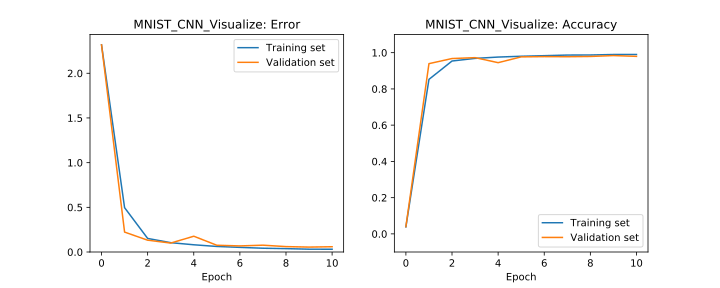

       |  Training |  Training |  Validate |  Validate 
Epochs |     Error |  Accuracy |     Error |  Accuracy 
------ | --------- | --------- | --------- | --------- 
#   10 |   0.03085 |   0.99019 |   0.05895 |   0.97971 


In [10]:
cnn.reset()
cnn.train(epochs=10, record=True)

## Using PCA to See Learned Clusters

Once the network is trained, we can find the Principal Components of the space of representations at the hidden layer.

First, we create a list of the representations of the inputs at the hidden layer. We use just the first 1,000 to speed things up.

In [11]:
states = [cnn.propagate_to("hidden", i) for i in cnn.dataset.train_inputs[:1000]]

Next, we find the Principal Components of these representations:

In [12]:
pca = cx.PCA(states)

We can then transform these representations into the first 2 Principal Component dimensions, scaling them between 0 and 1:

In [13]:
xy = pca.transform(states, scale=True)

Finally, we can plot the inputs in this transformed space to get an idea of how the network as learned to re-represent them:

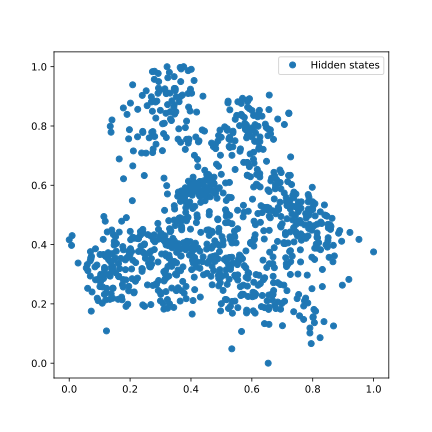

In [14]:
cx.scatter(["Hidden states", xy])

Ok. However, that plot doesn't show how the items group together. In order to do that, we need to plot each category separately. 

First, we make a dictionary mapping the category to the first 100 (to speed things up and not overwhelm the scatter plot) instances of that category:

In [15]:
groups = {category: cnn.dataset.inputs.select(lambda i,ds: ds.targets[i] == cx.onehot(category, 10), 
                                              slice=100,
                                              index=True)
          for category in range(10)}

Now we can do the same as above, but plotting each category separately:

In [16]:
def scatter_all(net, epoch):
    lines = []
    for i in range(10):
        states = [net.propagate_to("hidden", i) for i in net.dataset.train_inputs[groups[i]]]
        xy = pca.transform(states, scale=True)
        lines.append([str(i), xy])
    return cx.scatter(lines, title="Hidden State after %s epochs" % epoch, format="image")

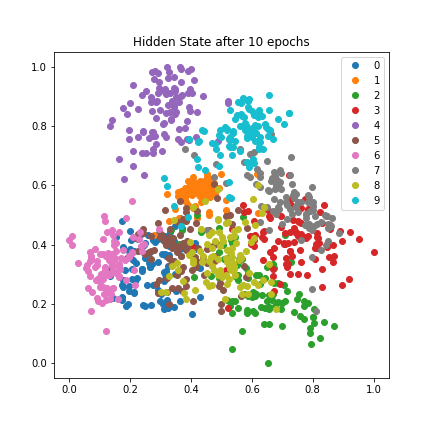

In [17]:
scatter_all(cnn, 10)

We can now use this function with the playback and movie methods to see the development of the clustering of the 10 categories:

SequenceViewer(children=(VBox(children=(HBox(children=(IntSlider(value=0, continuous_update=False, description='MNIST_CNN_Visualize Playback:', layout=Layout(width='100%'), max=10, style=SliderStyle(description_width='initial')), Label(value='of 11', layout=Layout(width='100px'))), layout=Layout(height='40px')), HBox(children=(Button(icon='fast-backward', layout=Layout(width='100%'), style=ButtonStyle()), Button(icon='backward', layout=Layout(width='100%'), style=ButtonStyle()), IntText(value=0, layout=Layout(width='100%')), Button(icon='forward', layout=Layout(width='100%'), style=ButtonStyle()), Button(icon='fast-forward', layout=Layout(width='100%'), style=ButtonStyle()), Button(description='Play', icon='play', layout=Layout(width='100%'), style=ButtonStyle())), layout=Layout(height='50px', width='100%'))), layout=Layout(width='100%')), Output()))

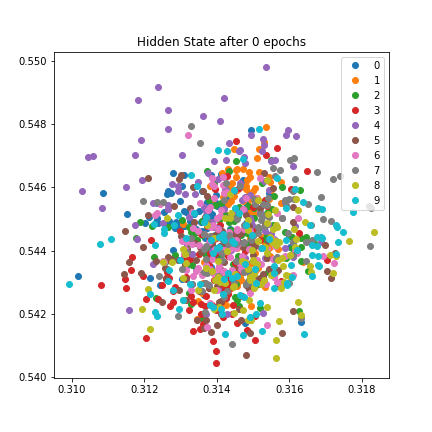

In [18]:
cnn.playback(scatter_all)

In [19]:
cnn.movie(scatter_all)

## Scatter Images

That is useful, but it is impossible to see how the individual inputs vary in a cluster. To see this, instead of plotting a colored dot at the PCA location, we can actually show the input as an image.

First, we need a list of pictures, and their coordinates in PCA space. We use the first 1,000 to match the above:

In [20]:
pics = [cx.array_to_image(v) for v in cnn.dataset.inputs[:1000]]
states = [cnn.propagate_to("hidden", i) for i in cnn.dataset.train_inputs[:1000]]
xy = pca.transform(states, scale=True)

Now we can use conx's scatter_images function that takes a list of images of the inputs, and the (x,y) locations in PCA space:

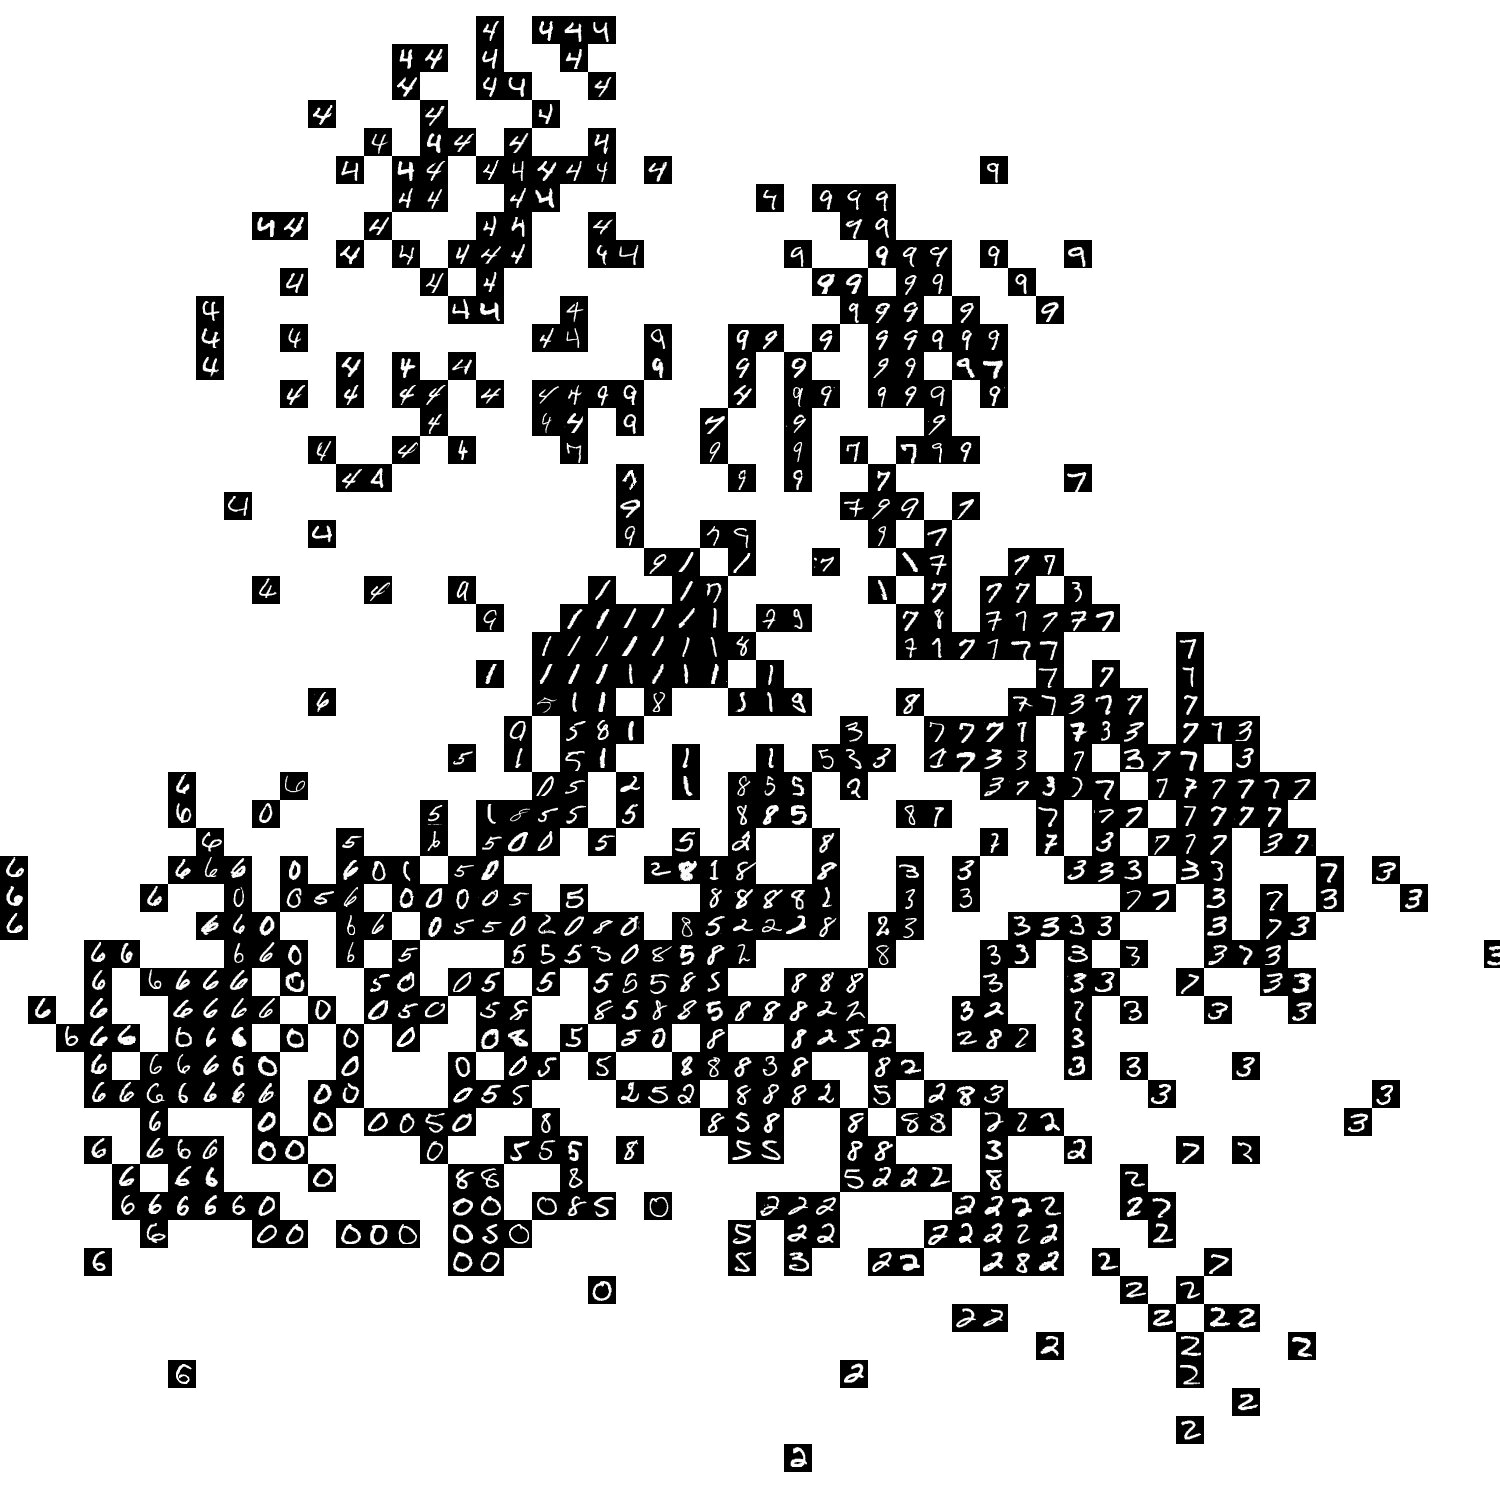

In [21]:
cx.scatter_images(pics, xy, size=(1500,1500), scale=1.0)

You may have to increase the size of the image, or vary the scale to see the clusters with minimal overlap but not too much space between points/images.